# Singular Value Decomposition (SVD), Principal Component Analysis (PCA) and Eigenfaces

Say I have a data-set `X` which came to me as a numpy array.

In [17]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

X = np.genfromtxt("PCA_data.txt")

In [18]:
# in case you are curious, this is how I generated the data
# mean = np.array([0,0])
# covariance = np.array([[12,11],[-1,1]])
# X = np.random.multivariate_normal(mean, covariance, 400)
# np.savetxt("PCA_data.txt", X)

In [19]:
# mean = [0,0]
# cov = X.T.dot(X) / 400
# X = np.random.multivariate_normal(mean, cov, 400)

In [20]:
X.shape

(400, 2)

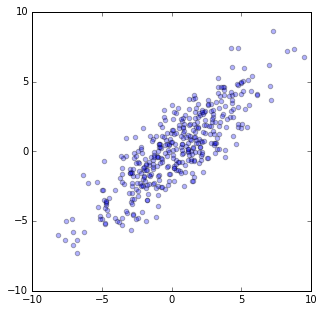

In [21]:
plt.figure(figsize=(5,5))
plt.axis([-10,10,-10,10])
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.savefig("PCA_X", transparent=True, dpi=300)

Principal Component Analysis will find the most significant direction, then the second most significant direction, then the third most significant direction,.... (in our case the data is 2-d, so only two directions, but actual data can be very high-dimensional). 

We want to find the red vectors:

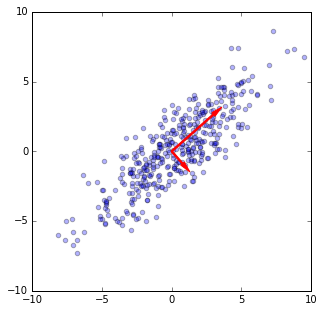

In [15]:
# v1 = np.array([ 0.74980752,  0.66165601]) * 79.77145457 / 20
# v2 = np.array([ 0.66165601, -0.74980752]) * 23.41073082 / 20
v1 = [ 2.99066183,  2.63906312]
v2 = [ 0.77449254, -0.8776771 ]

plt.figure(figsize=(5,5))
plt.axis([-10,10,-10,10])
plt.scatter(X[:,0], X[:,1], alpha=0.3)
plt.arrow(0, 0, v1[0], v1[1], width=0.1, head_width=0.34, head_length=0.8, color="red")
plt.arrow(0, 0, v2[0], v2[1], width=0.1, head_width=0.34, head_length=0.8, color="red")
plt.savefig("PCA_comps", transparent=True, dpi=300)

This is very useful, because your data can be very high-dimensional, but actually few of the directions might account for most of the variation in the data. So if you were in 1000-dimensional space, but three of the red arrows are huge and the other arrows are very small, you could approximate each data-point quite well using the biggest red arrows only.

In [7]:
# * The matrix $C = \frac{X^T X}{N}$ stores the covariances between the dimensions. (you can think of covariance as something that measures how correlated things are, but unlike correlation, covariance is not bounded between -1 and 1)
# * $C = X^T X/N$ being a $d \times d$ symmetric matrix (($X^T X)^T = X^T(X^T)^T = X^T X$), there is an orthonormal basis of eigenvectors of $C$. (this is a theorem, symmetric matrices are orthogonally diagonalizable)<br>
# $$C = VLV^T$$<br>
# Where $L$ is a diagonal matrix with eigenvalues $\lambda_1, \lambda_2,...$. These eigenvalues happen to be all positive (covariance matrix is positive semi-definite). Let us also assume that they are ordered: <br>
# $$\lambda_1 \geq \lambda_2\geq \dots$$
# <br>
# * These eigenvectors, ordered by the size of their corresponding eigenvalues give you the most significant, second most significant,... directions in the space where your data-set lives. These are the columns of $V$, rows of $V^T$. 

Let $X$ be the $N\times d$ matrix whose rows are the data-points. There are $N$ data points and each data point has $d$ dimensions. 

There is a decomposition of any real matrix called the Singular Value Decomposition (SVD):

$$X = U S V^T$$

Where $S$ is a diagonal matrix whose diagonal entries are positive and in decreasing order. $U$ and $V$ are orthogonal matrices (i.e. columns of V are orthonormal, same for U). 

The columns of $V$ are the significant directions we were looking for. S's entries are the amount of variance of the data in that direction. Finally, U (or more precisely U*S) stores how you write each coordinate vector in terms of the significant directions in V. 

The proof of SVD is quite nice and makes use of a lot of cool things in linear algebra (e.g. adjoint matrix, the fact that symmetric matrices are orthogonally diagonalizable,...) If you are interested, I can recommend reading Lay's linear algebra book, section 7.4 and asking me any questions you might have. 

Just as a small bonus, let me tell you that the significant directions (columns of $V$) are the eigenvectors of the covariance matrix $\frac{X^T X}{N}$, and the eigenvalues (entries of $S$) are the square roots of the eigenvalues of the covariance matrix. The covariance matrix tells you how correlated each direction is with other directions in the space where the data-set lives (not to be confused with the similar 'correlation matrix').  

Anyway, let's do it in Python.

In [8]:
U, s, Vt = scipy.linalg.svd(X)

In [9]:
s

array([ 79.77145457,  23.41073082])

In [10]:
Vt

array([[ 0.74980752,  0.66165601],
       [ 0.66165601, -0.74980752]])

## Applying Principal Component Analysis to the Faces Dataset

Load the libraries we are going to use and load the data

In [11]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
X = np.genfromtxt("faces.txt", delimiter=None) # load face dataset

X has 4916 rows. Each row consists of the values of the pixels of an image of size 24x24

In [13]:
X.shape

(4916, 576)

Since the images are flattened (turned into vector of dimension 576 instead of 24x24), we would normally reshape them, but maybe it's better to reshape them only when we are going to look at the pictures:

In [14]:
# we will keep doing this, so better to write a function for it
def showimg(imvec):
    plt.figure(figsize=(2,2))
    img = np.reshape(imvec,(24,24)) # convert vectorized data point t 
    plt.imshow( img.T , cmap="gray") 

## 10 images from the data-set

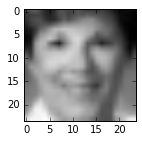

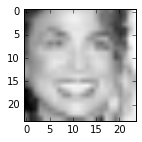

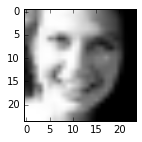

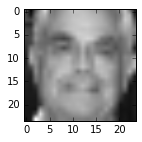

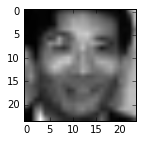

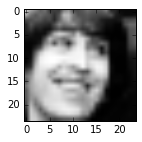

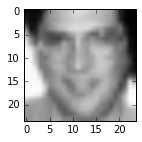

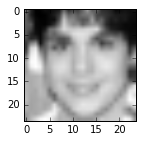

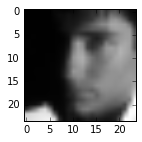

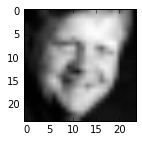

In [15]:
startface = 99
for i in range(startface, startface+10):
    showimg(X[i,:])

## Average face

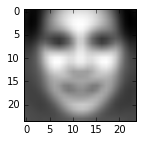

In [16]:
# normalize
mean_image = np.apply_along_axis(np.mean, 0, X)

showimg(mean_image)

Remove the average face to center the image vectors, so that the vectors are centered at 0. (If the mean is not zero, the "most significant direction" will be skewed towards the direction of the mean)

In [17]:
X00 = X - mean_image
#for i in range(10):
#    showimg(X00[i,:])

## Computing the Singular Value Decomposition

X00 is the matrix whose rows are the faces

Singular Value Decomposition is basically diagonalization but since it's not a square matrix, we get

X = U S Vt

where S is diagonal

In [18]:
U, s, Vt = scipy.linalg.svd(X00, full_matrices=False)

### First 20 Eigenvalues


In [19]:
s[:20]

array([ 53251.34719568,  32595.66505196,  29910.08522183,  21359.27850137,
        17159.4578467 ,  16019.4947119 ,  14029.74221998,  12304.64665821,
        12046.00901233,  11027.43224609,  10476.10725956,   9922.02270687,
         8849.16802043,   8551.03056273,   8287.00213677,   7826.82829473,
         7456.92666729,   7315.06688781,   7128.51002346,   6917.88253323])

### First 10 Eigenvectors

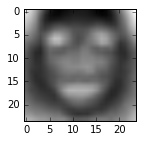

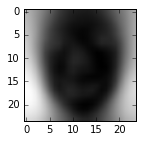

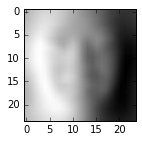

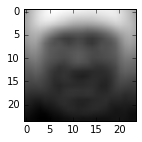

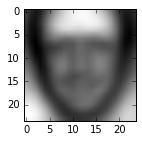

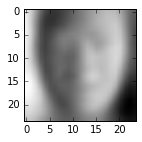

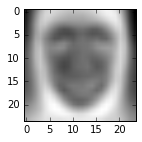

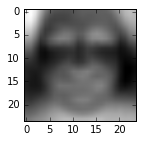

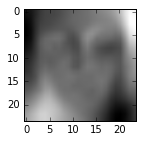

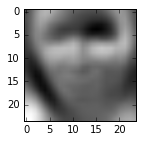

In [20]:
for i in range(10):
    showimg(Vt[i,:])

Setting 

W = U.S

This makes X00 = W.Vt so that we can approximate easily later

In [21]:
W = U.dot(np.diag(s))

In [22]:
# how much to approximate

approxes = [W[:,:k].dot(Vt[:k,:]) for k in [1,10,30,85, 250]]

## Taking the first 1,10,30,85, 250 eigenvector components


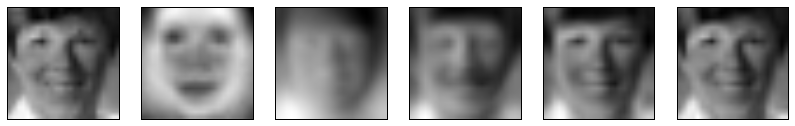

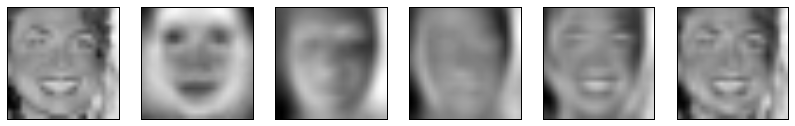

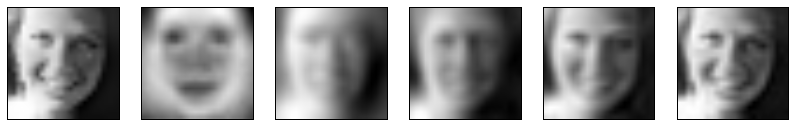

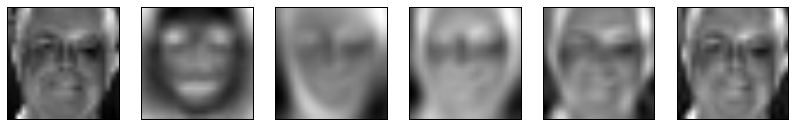

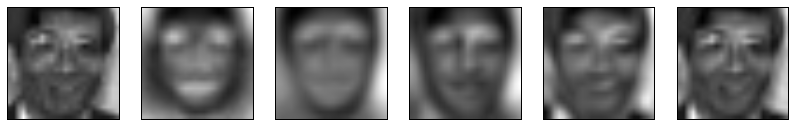

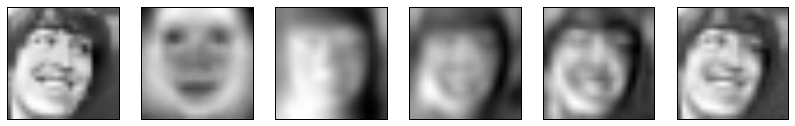

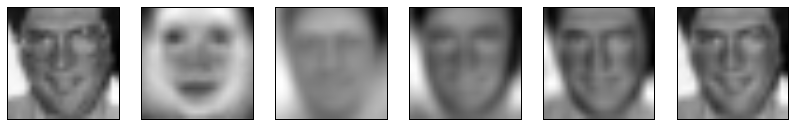

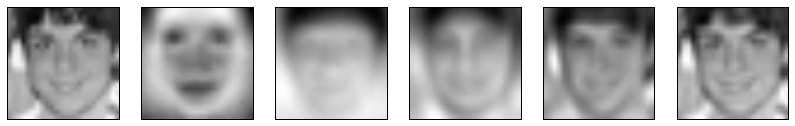

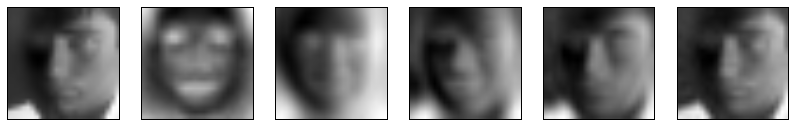

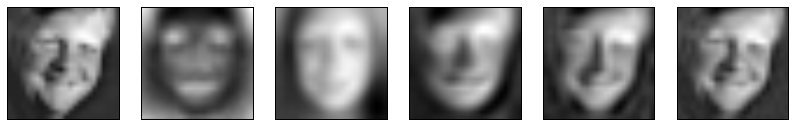

In [23]:
for i in range(startface,startface+10):
    im1 = X[i,:] - mean_image
    im2 = approxes[0][i , : ]
    im3 = approxes[1][i , : ]
    im4 = approxes[2][i , : ]
    im5 = approxes[3][i , : ]
    im6 = approxes[4][i , : ]
    fig, axes = plt.subplots(1, 6, figsize=(14,2),subplot_kw={'xticks': [], 'yticks': []})
    axx = axes.flat
    img = np.reshape(im1,(24,24)) # convert vectorized data point t
    axx[0].imshow(img.T, cmap="gray")
    img = np.reshape(im2,(24,24)) # convert vectorized data point t
    axx[1].imshow(img.T, cmap="gray")
    img = np.reshape(im3,(24,24)) # convert vectorized data point t
    axx[2].imshow(img.T, cmap="gray")
    img = np.reshape(im4,(24,24)) # convert vectorized data point t
    axx[3].imshow(img.T, cmap="gray")
    img = np.reshape(im5,(24,24)) # convert vectorized data point t
    axx[4].imshow(img.T, cmap="gray")
    img = np.reshape(im6,(24,24)) # convert vectorized data point t
    axx[5].imshow(img.T, cmap="gray")


## Don't forget to add the mean back!

Remember that we had centered the mean of the data at $(0,0,...,0)$ by removing the mean. We must not forget to add the mean back!

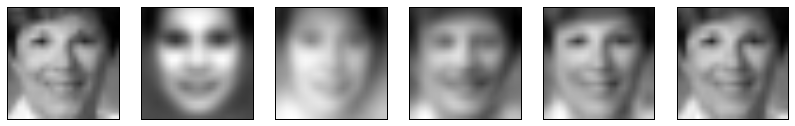

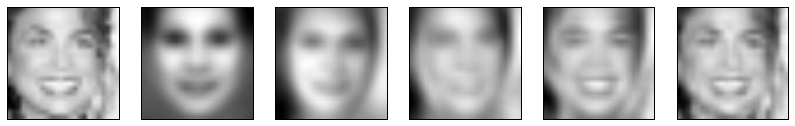

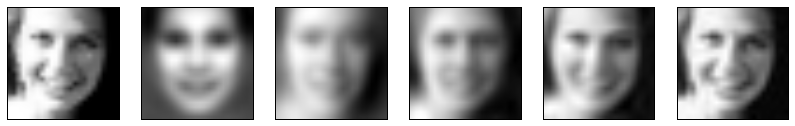

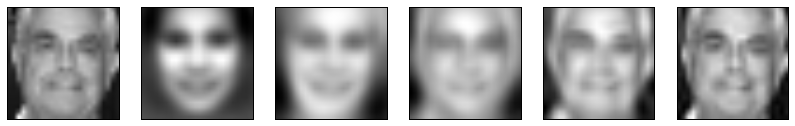

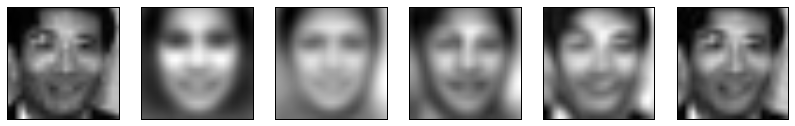

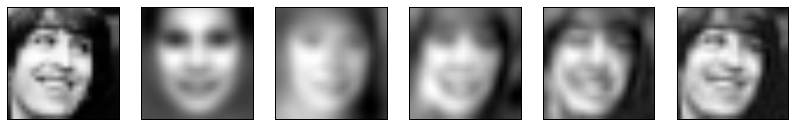

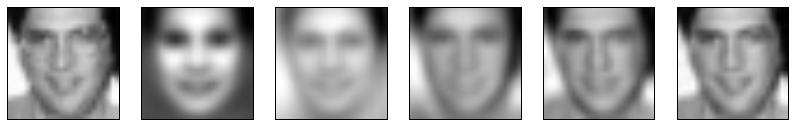

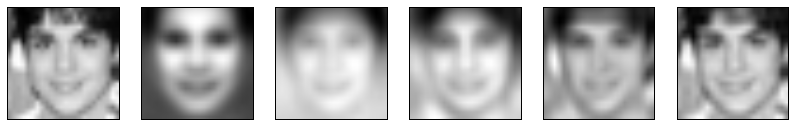

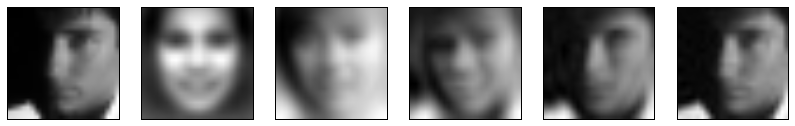

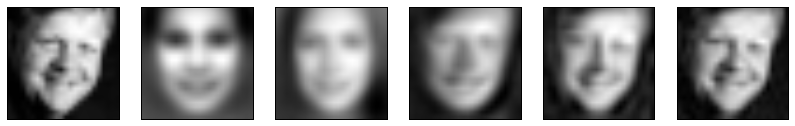

In [24]:
for i in range(startface,startface+10):
    im1 = X[i,:]
    im2 = approxes[0][i , : ] + mean_image
    im3 = approxes[1][i , : ] + mean_image
    im4 = approxes[2][i , : ] + mean_image
    im5 = approxes[3][i , : ] + mean_image
    im6 = approxes[4][i , : ] + mean_image
    fig, axes = plt.subplots(1, 6, figsize=(14,2),subplot_kw={'xticks': [], 'yticks': []})
    axx = axes.flat
    img = np.reshape(im1,(24,24)) # convert vectorized data point t
    axx[0].imshow(img.T, cmap="gray")
    img = np.reshape(im2,(24,24)) # convert vectorized data point t
    axx[1].imshow(img.T, cmap="gray")
    img = np.reshape(im3,(24,24)) # convert vectorized data point t
    axx[2].imshow(img.T, cmap="gray")
    img = np.reshape(im4,(24,24)) # convert vectorized data point t
    axx[3].imshow(img.T, cmap="gray")
    img = np.reshape(im5,(24,24)) # convert vectorized data point t
    axx[4].imshow(img.T, cmap="gray")
    img = np.reshape(im6,(24,24)) # convert vectorized data point t
    axx[5].imshow(img.T, cmap="gray")